In [33]:
!pip install pandas
import json
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
# Retain ordering of songs
# Remove genre, we know the genre
# write code to convert time to min:ss in case we want to pretty that for anything
# Line graphs for length of songs, mood, energy, popularity, BPM, key for whole setlist, then for each artist in setlist

    # If I want to make time pretty, use this.
    # ms = int(i['length'])
    # s, ms = divmod(ms, 1000)
    # m, s = divmod(s, 60)
    # if (len(str(s)) == 1) and (s < 6):
    #     s = s*10
    # if len(str(s)) == 1:
    #     i['length'] = str(m) + ":0" + str(s)
    # elif s == 0:
    #     i['length'] = str(m) + ":" + str(s) + '0'
    # else:
    #     i['length'] = str(m) + ":" + str(s)


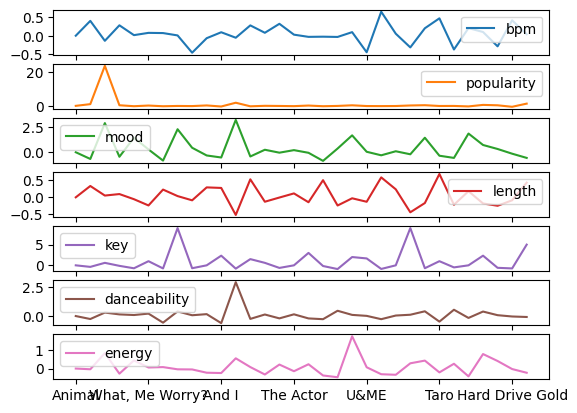

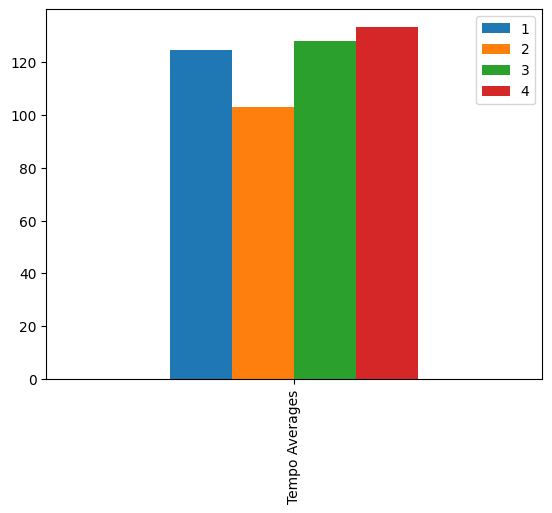

In [73]:
f = open("Downloads/altjPTM.json")
data = json.load(f)

for i in data:
    # remove genre from df
    del i["genre"]


# !!!!!!Whole setlist level!!!!!!
# Graph name of song as y axis and graphs relevant data points by differences of value
# Take data, store the difference as a percent of change, then graph all relevant fields on one graph
bpm = []
popularity = []
mood = []
length = []
key = []
danceability = []
energy = []
name = []
for i in data:
    bpm.append(i["bpm"])
    popularity.append(i["popularity"])
    mood.append(i["mood"])
    length.append(i["length"])
    key.append(i["key"] + 1)
    danceability.append(i["danceability"])
    energy.append(i["energy"])
    name.append(i["name"])


# Make a new df with these series then run pc_change on it, then graph it
# Had to shift all key values by 1 as 0 isn't recognized in percent of change. So imagine that C is now 1 instead of 0
df = pd.DataFrame(
    {
        "bpm": bpm,
        "popularity": popularity,
        "mood": mood,
        "length": length,
        "key": key,
        "danceability": danceability,
        "energy": energy,
    },
    index=name,
)
df2 = df.pct_change()
df3 = df2.fillna(0)
axes = df3.plot.line(subplots=True, use_index=True)
type(axes)

# !!!!!!TEMPO PROFILE LOGIC!!!!!
bpm = []
averages = ["Tempo Averages"]
for i in data:
    bpm.append(i["bpm"])
bpm = np.array(bpm)

bpm2 = np.array_split(bpm, 4)
quadrant1 = pd.Series(bpm2[0]).mean()
quadrant2 = pd.Series(bpm2[1]).mean()
quadrant3 = pd.Series(bpm2[2]).mean()
quadrant4 = pd.Series(bpm2[3]).mean()
df = pd.DataFrame(
    {
    "1": quadrant1, 
    "2": quadrant2, 
    "3": quadrant3, 
    "4": quadrant4
    }, 
    index = averages)
df.plot.bar(use_index=True)
# df = pd.DataFrame(data)
# print(df)
f.close()


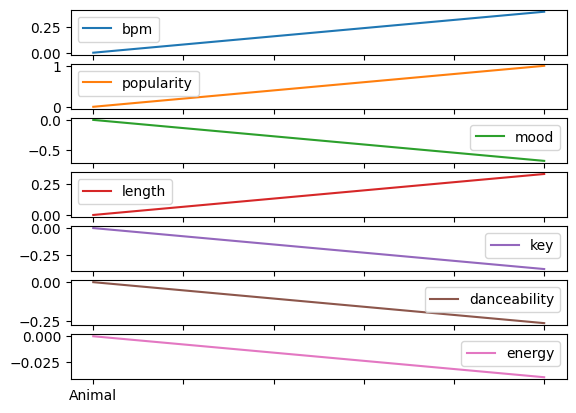

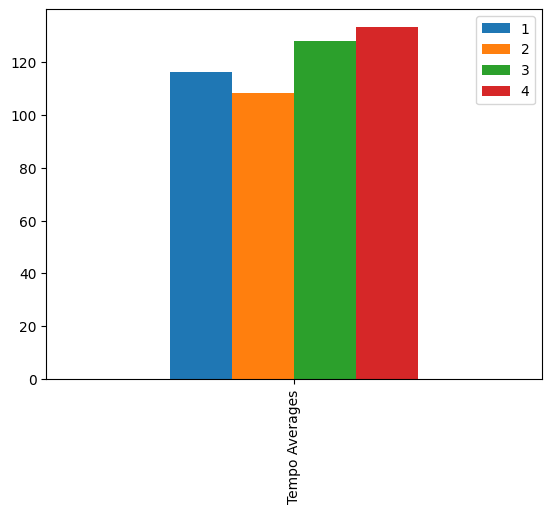

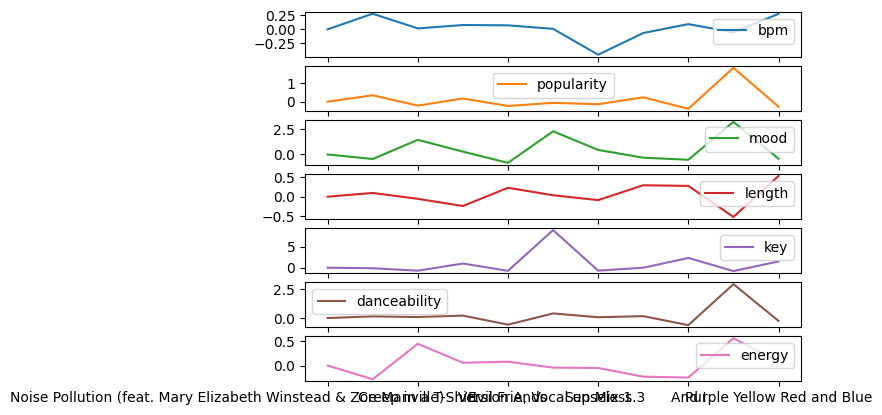

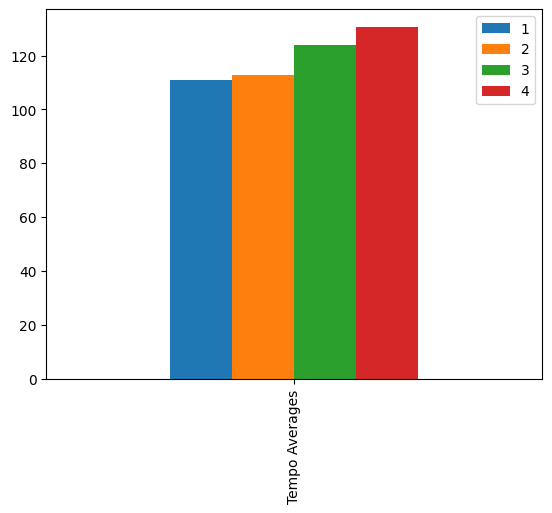

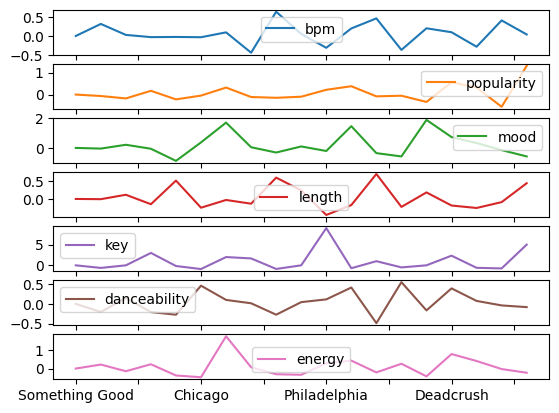

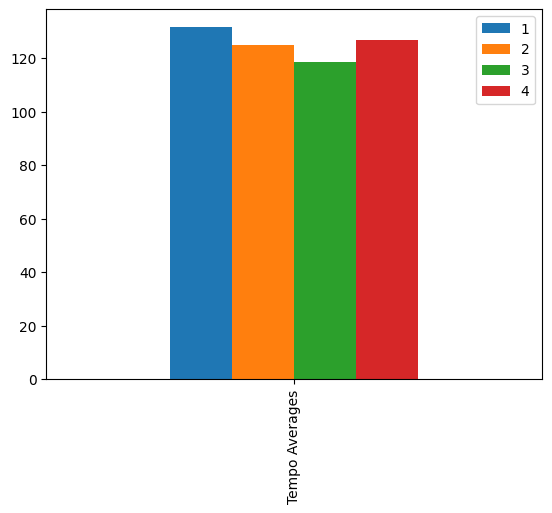

In [75]:
f = open("Downloads/altjPTM.json")
data = json.load(f)

for i in data:
    # remove genre from df
    del i["genre"]


# !!!!!!Artist level!!!!!!
# Find list of artists in the data so it can be seperated  by artist
artists = []
for i in data:
    if i["artist"] not in artists:
        artists.append(i["artist"])

bpm = []
popularity = []
mood = []
length = []
key = []
danceability = []
energy = []
name = []
bpmForTempo = []
for artist in artists:
    for i in data:
        if artist == i["artist"]:
            bpm.append(i["bpm"])
            popularity.append(i["popularity"])
            mood.append(i["mood"])
            length.append(i["length"])
            key.append(i["key"] + 1)
            danceability.append(i["danceability"])
            energy.append(i["energy"])
            name.append(i["name"])
            bpmForTempo.append(i["bpm"])
                       
    
    # Make a new df with these series then run pc_change on it, then graph it
    # Had to shift all key values by 1 as 0 isn't recognized in percent of change. So imagine that C is now 1 instead of 0
    df = pd.DataFrame(
        {
            "bpm": bpm,
            "popularity": popularity,
            "mood": mood,
            "length": length,
            "key": key,
            "danceability": danceability,
            "energy": energy,
        },
        index=name,
    )
    df2 = df.pct_change()
    df3 = df2.fillna(0)
    axes = df3.plot.line(subplots=True, use_index=True)
    type(axes)
    #reset values to empty for next artist
    bpm = []
    popularity = []
    mood = []
    length = []
    key = []
    danceability = []
    energy = []
    name = []
    # !!!!!!TEMPO PROFILE LOGIC!!!!!
    # I don't suggest that this be used for any setlists below 4 songs. We can refactor code this to be dynamic based on how many songs are present in an array
    averages = ["Tempo Averages"]
    for i in data:
        bpmForTempo.append(i["bpm"])
    bpmForTempo = np.array(bpmForTempo)
    
    bpm2 = np.array_split(bpmForTempo, 4)
    quadrant1 = pd.Series(bpm2[0]).mean()
    quadrant2 = pd.Series(bpm2[1]).mean()
    quadrant3 = pd.Series(bpm2[2]).mean()
    quadrant4 = pd.Series(bpm2[3]).mean()
    df = pd.DataFrame(
        {
        "1": quadrant1, 
        "2": quadrant2, 
        "3": quadrant3, 
        "4": quadrant4
        }, 
        index = averages)
    df.plot.bar(use_index=True)
    bpmForTempo = []

# df = pd.DataFrame(data)
# print(df)
f.close()
